In [47]:
import pandas as pd
import numpy as np
import datetime
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from matplotlib import pyplot as plt

my_path = '../input/us-wildfire-data-plus-other-attributes/FW_Veg_Rem_Combined.csv'
my_data = pd.read_csv(my_path)

In [48]:
# récupération des données + cleaning
fires_raw = my_data.loc[:, ['fire_size', 'disc_clean_date', 'stat_cause_descr', 'disc_pre_year']]
fires = fires_raw.rename(columns = {'fire_size' : 'Fire size', 'stat_cause_descr' : 'Cause', 'disc_pre_year' : 'Year'})
fires['Date'] = pd.to_datetime(fires['disc_clean_date'], format="%m/%d/%Y")
fires = fires.set_index('Date')

#Vérification des erreurs de typo
causes = fires_raw['stat_cause_descr'].unique()
causes.sort()
causes

#Pourcentage de data manquante
missing_values_count = fires_raw.isnull().sum()
total_cells = np.product(fires_raw.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
percent_missing

#Vérification des valeurs nulles
missing_values_count = fires_raw.isnull().sum()
missing_values_count

fire_size           0
disc_clean_date     0
stat_cause_descr    0
disc_pre_year       0
dtype: int64

<AxesSubplot:xlabel='Date'>

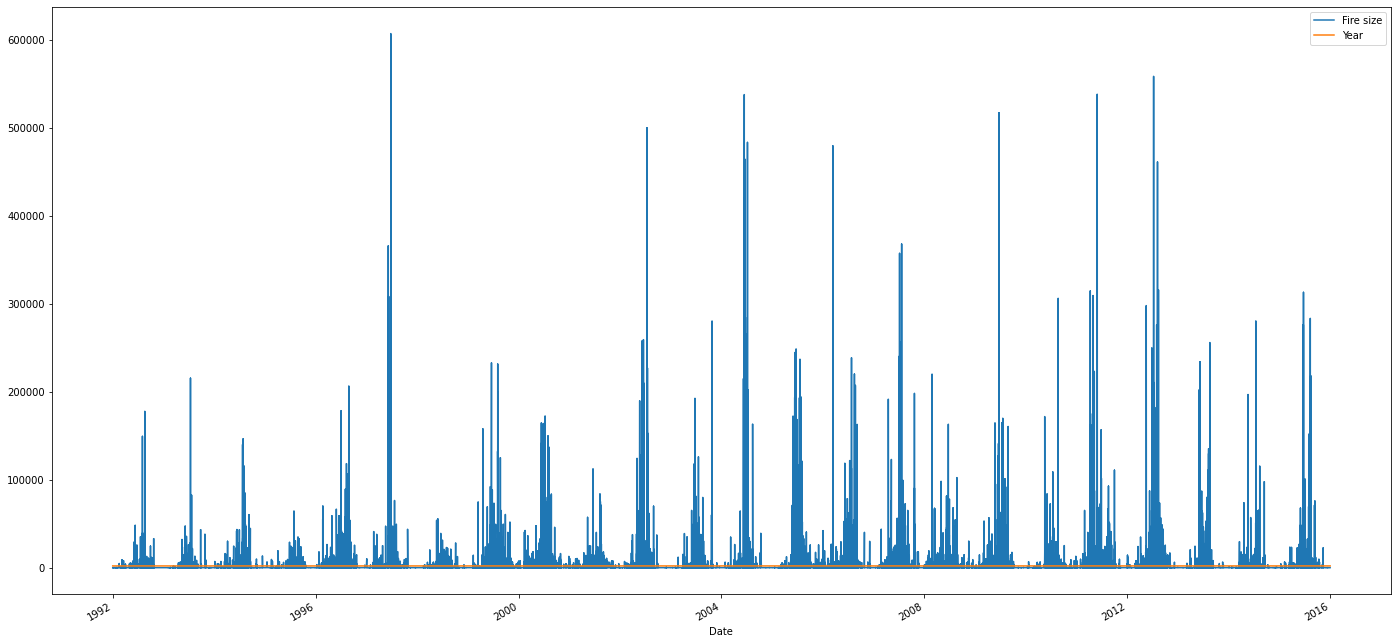

In [49]:
# graph de la taille des feu en fonctions des années
fires.plot(figsize=(24,12))

<AxesSubplot:ylabel='None'>

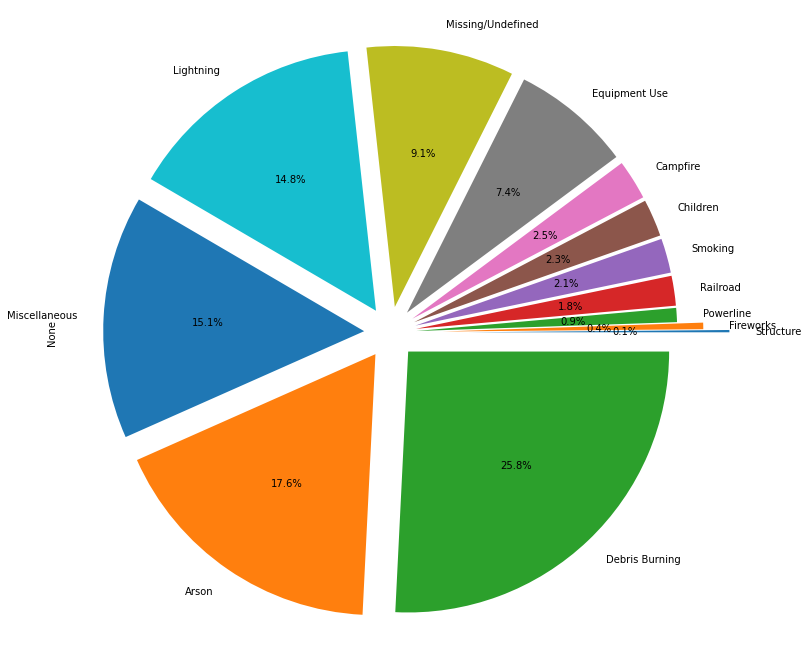

In [50]:
# part des feu totaux dont chaque cause est responsable 
myexplode = [0.3, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
fires_pie =fires.groupby(['Cause']).size() 
fires_pie = fires_pie.sort_values()
fires_pie.plot(kind='pie', explode=myexplode, y='Fire size', autopct='%1.1f%%', figsize=(24,12))

<AxesSubplot:ylabel='Fire size'>

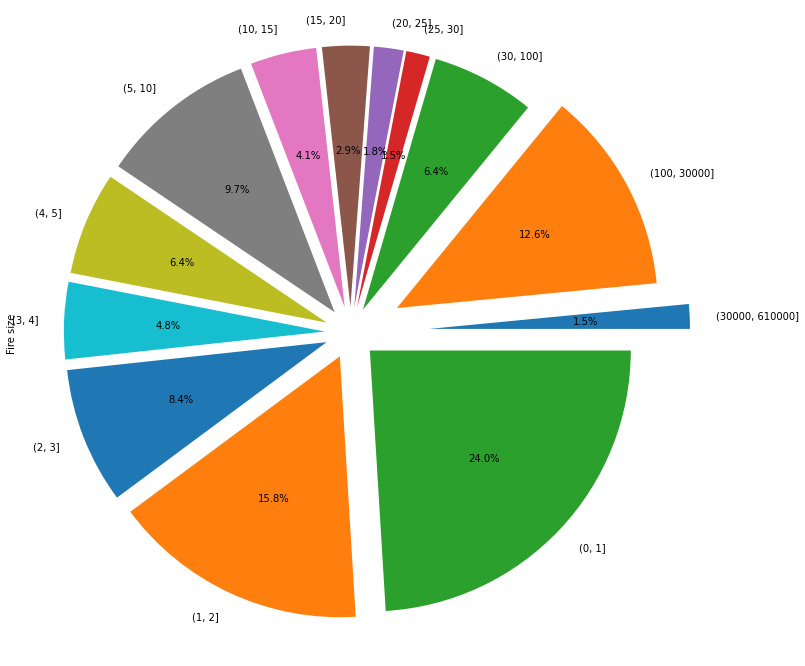

In [51]:
# pie avec la taille des feux 
fires_size_pie = pd.cut(x=fires['Fire size'], bins=[0, 1, 2, 3 ,4, 5, 10, 15, 20, 25 ,30, 100, 30000, 610000])
fires_size_pie = fires_size_pie.value_counts()
fires_size_pie = fires_size_pie.sort_index(ascending=False)
fires_size_pie.plot(kind='pie', explode=myexplode, autopct='%1.1f%%', figsize=(24,12))

<AxesSubplot:xlabel='Year'>

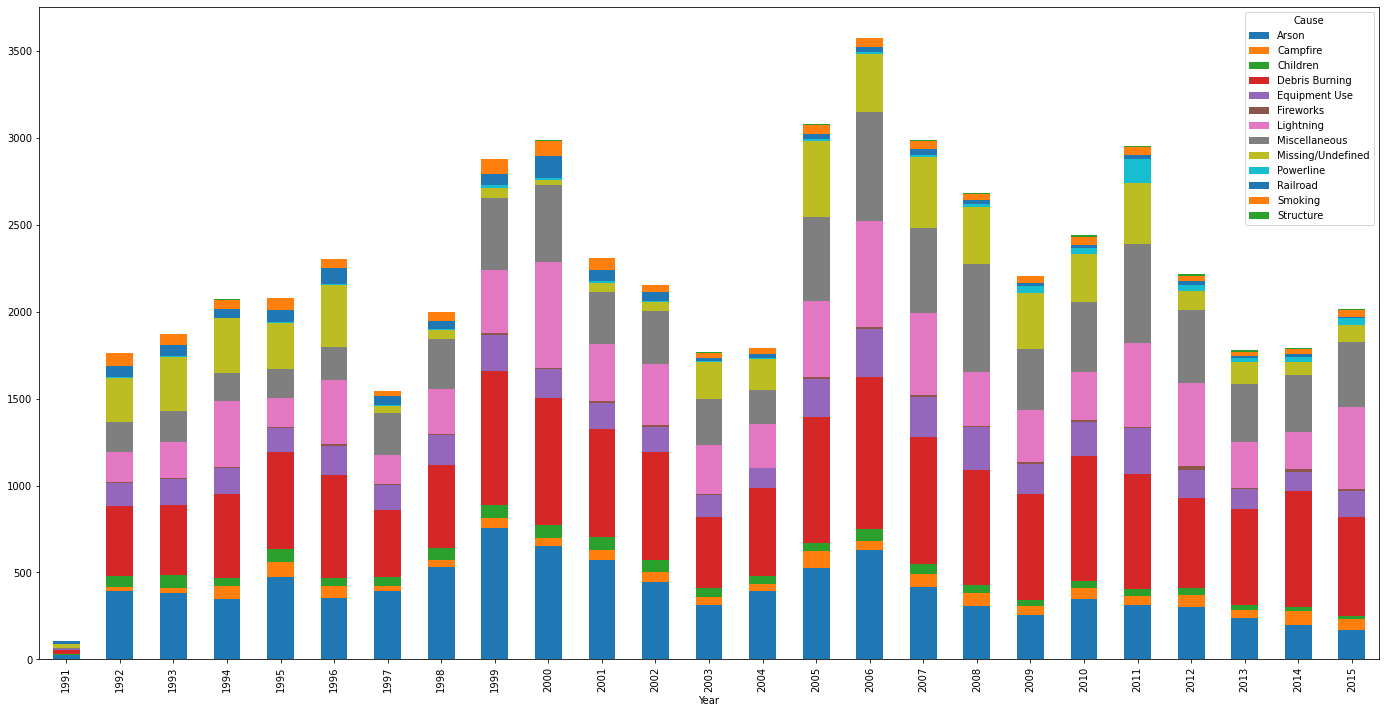

In [52]:
# graph du nombre de feu par cause de feu par année
fires_size_by_year = fires[['Cause', 'Year']]
fires_size_by_year.groupby(['Year', 'Cause']).size().unstack().plot(kind='bar', stacked=True, figsize=(24, 12))

In [53]:
 fire_size_interval = fires[['Cause', 'Fire size']]
fire_size_interval = fire_size_interval.reset_index(drop=True)
fire_size_interval.index = list(fire_size_interval.index)
fire_size_interval.rename_axis('index', inplace=True)

fire_size_interval['intervalle'] = pd.cut(x=fire_size_interval['Fire size'], bins=[0, 1, 2, 3 ,4, 5, 10, 15, 20, 25 ,30, 100, 30000, 610000])

fire_size_interval

,Cause,Fire size,intervalle
index,,,
0,Missing/Undefined,10.0,"(5, 10]"
1,Arson,3.0,"(2, 3]"
2,Arson,60.0,"(30, 100]"
3,Debris Burning,1.0,"(0, 1]"
4,Miscellaneous,2.0,"(1, 2]"
...,...,...,...
55362,Missing/Undefined,6289.0,"(100, 30000]"
55363,Missing/Undefined,70868.0,"(30000, 610000]"
55364,Arson,5702.0,"(100, 30000]"


<AxesSubplot:xlabel='Cause'>

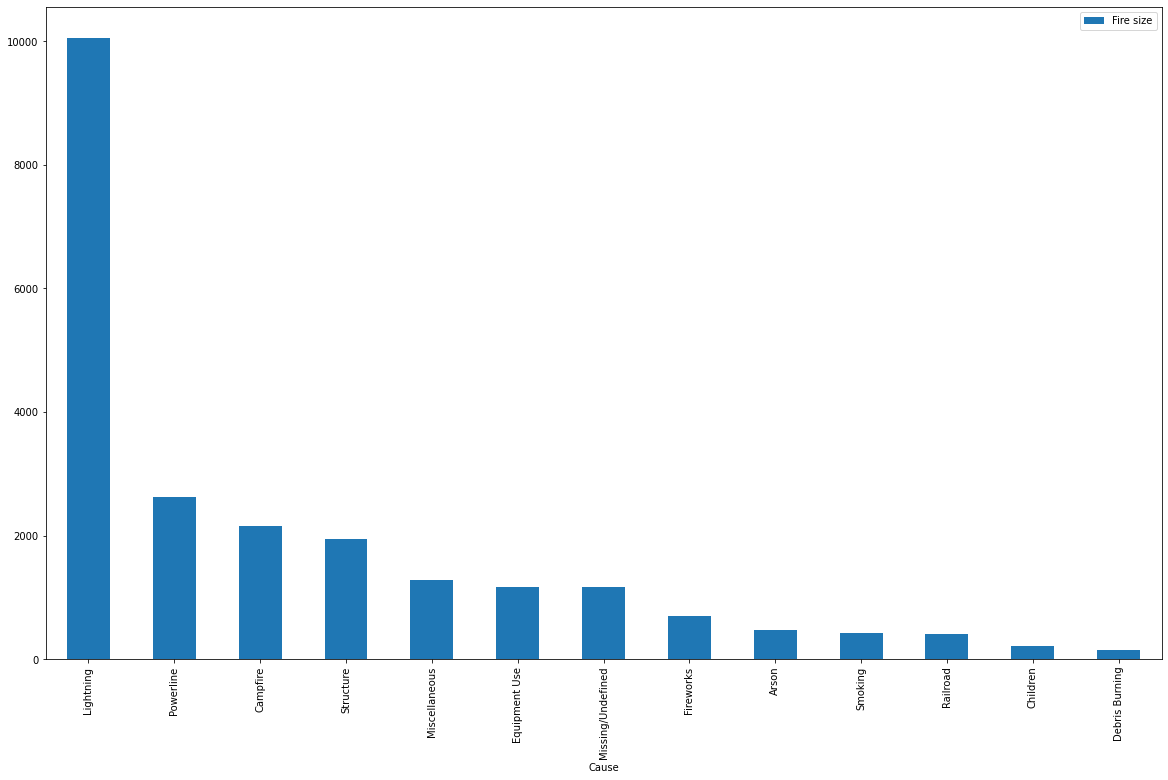

In [54]:
fire_size_mean_by_cause = fires[['Cause', 'Fire size']]

fire_size_mean_by_cause = fire_size_mean_by_cause.groupby('Cause').mean('Fire size')

fire_size_mean_by_cause = fire_size_mean_by_cause.sort_values(by=['Fire size'],  ascending=False)
fire_size_mean_by_cause.plot(kind="bar",figsize=(20, 12))

<AxesSubplot:xlabel='intervalle'>

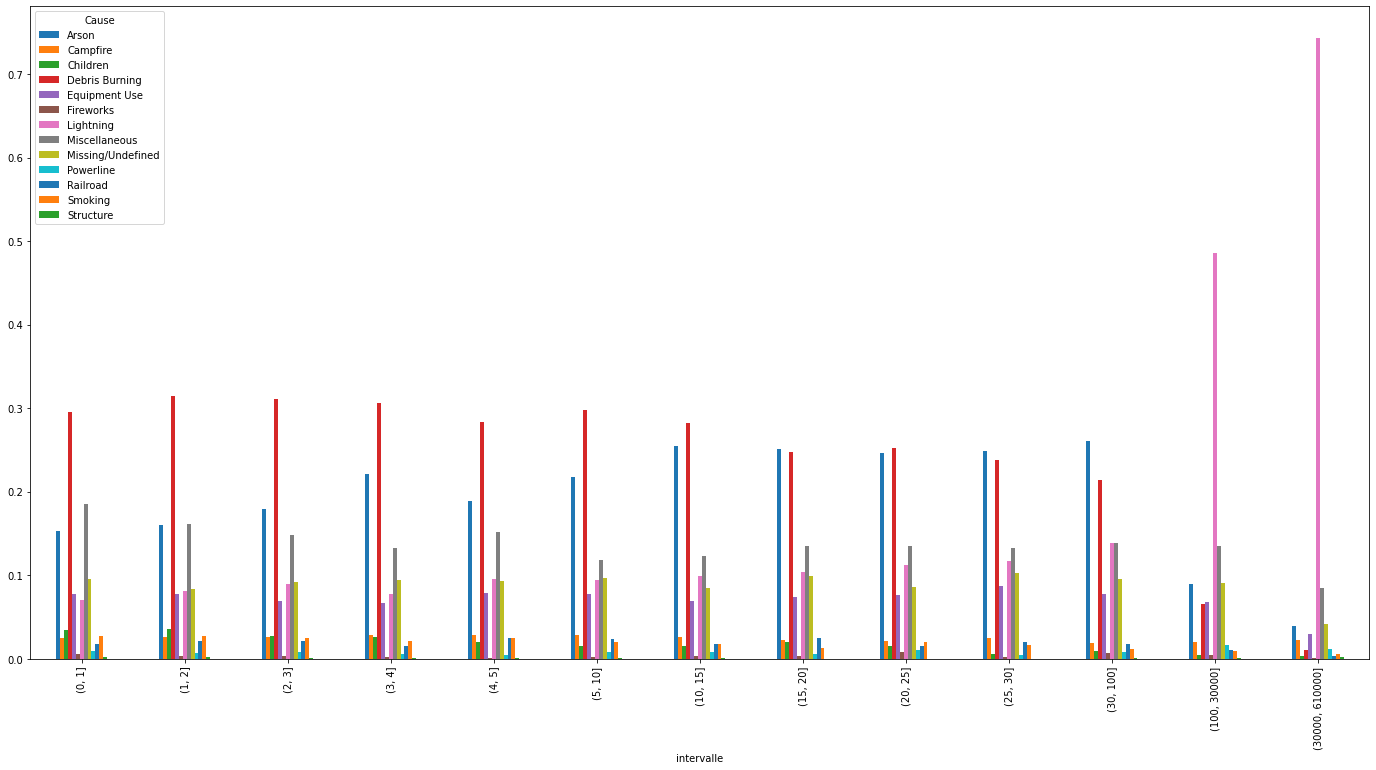

In [68]:
tableau_croise = pd.crosstab(fire_size_interval["intervalle"],fire_size_interval["Cause"], normalize='index')
tableau_croise.plot.bar(figsize=(24,12))

<AxesSubplot:xlabel='intervalle'>

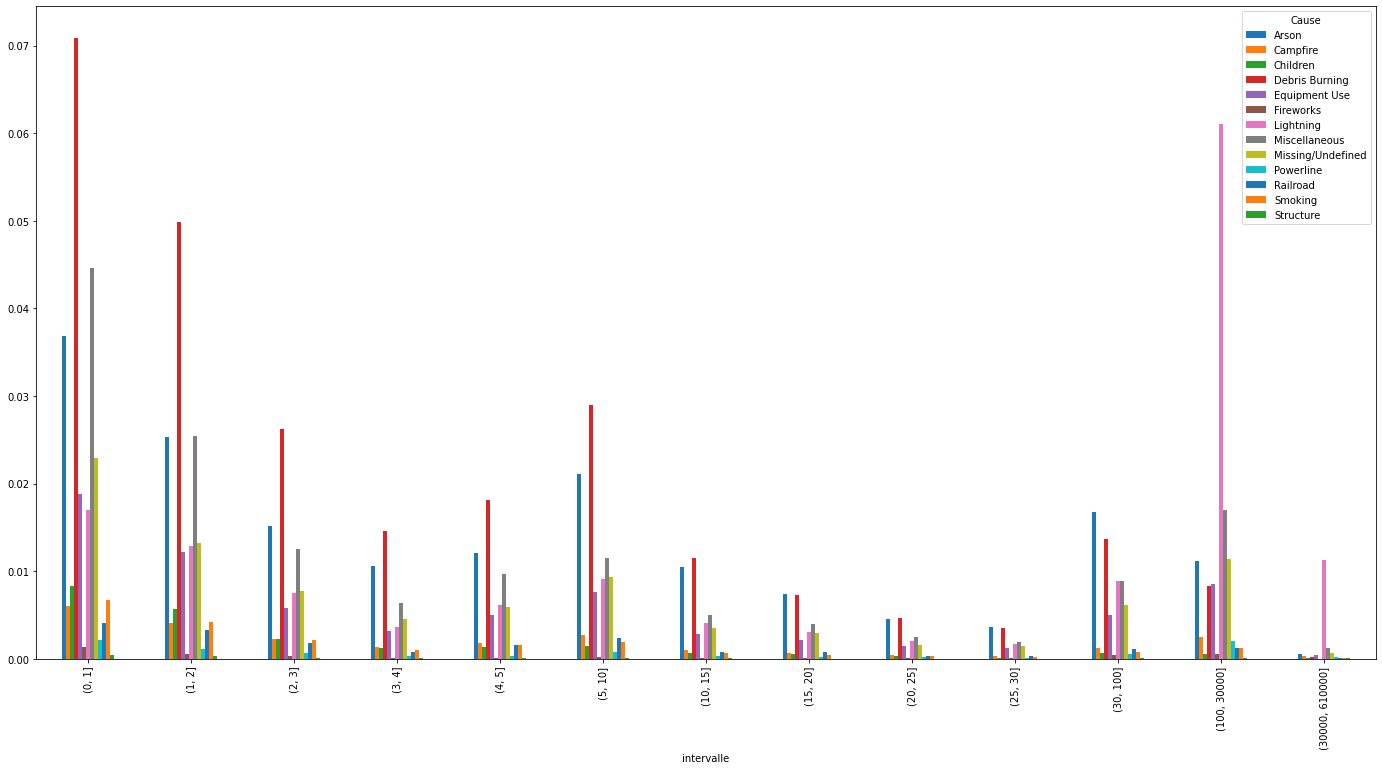

In [56]:
tableau_croise_normalize = pd.crosstab(fire_size_interval["intervalle"],fire_size_interval["Cause"], normalize=True)
tableau_croise_normalize.plot.bar(figsize=(24,12))

<AxesSubplot:xlabel='intervalle'>

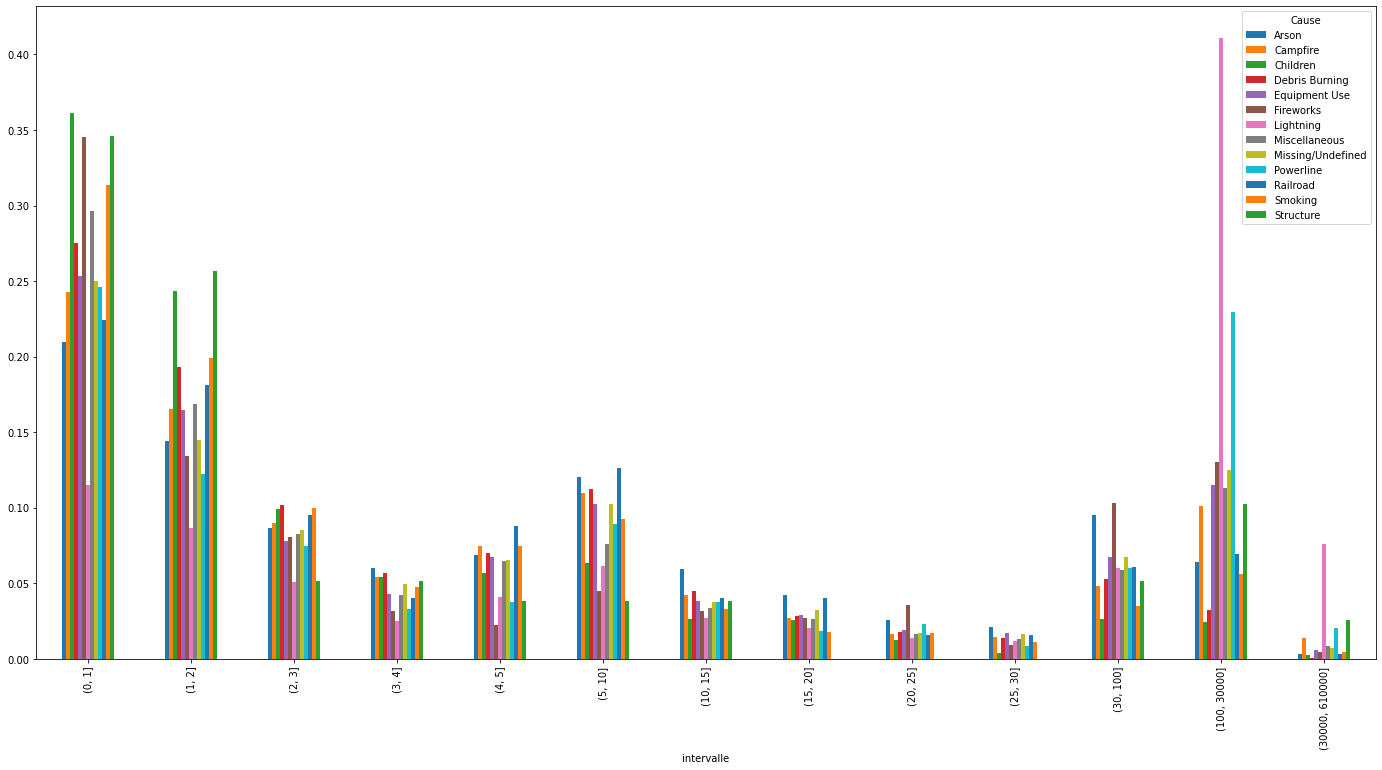

In [57]:
tableau_croise_normalize_col = pd.crosstab(fire_size_interval["intervalle"],fire_size_interval["Cause"], normalize='columns')
tableau_croise_normalize_col.plot.bar(figsize=(24,12))

In [58]:
#Récupérer les deux échantillons aléatoires pour les tests d'hypothèse
hyp_test = my_data.loc[0:55000, ['fire_size', 'disc_clean_date', 'stat_cause_descr', 'disc_pre_month']]
summer = hyp_test.query("disc_pre_month == 'Jun' or disc_pre_month == 'Jul' or disc_pre_month == 'Aug'")
summer.index = range(len(summer.index))
summer = summer.loc[0:499]
rest_of_year = hyp_test.query("disc_pre_month != 'Jun' and disc_pre_month != 'Jul' and disc_pre_month != 'Aug'")
rest_of_year.index = range(len(rest_of_year.index))
rest_of_year = rest_of_year.loc[0:499]

print(summer)
print(rest_of_year)

     fire_size disc_clean_date stat_cause_descr disc_pre_month
0       2.0000       9/22/1999    Miscellaneous            Aug
1       1.0000        8/8/2007            Arson            Jul
2       1.0000        7/6/2014        Fireworks            Jun
3       1.0000       8/30/2000    Miscellaneous            Jul
4      10.0000       7/14/2000            Arson            Jun
..         ...             ...              ...            ...
495  5774.2002       8/13/2003        Lightning            Jul
496     1.0000       7/24/1994        Lightning            Jun
497     1.0000        8/5/2009   Debris Burning            Jul
498     1.0000       8/15/1997          Smoking            Jul
499     1.0000        8/9/1994            Arson            Jul

[500 rows x 4 columns]
     fire_size disc_clean_date   stat_cause_descr disc_pre_month
0         10.0       2/11/2007  Missing/Undefined            Jan
1          3.0      12/11/2006              Arson            Nov
2         60.0       2/29